# Batching Over Resource Post-analysis

##### Imports

In [3]:
from neo4j import GraphDatabase
import matplotlib.pyplot as plt
import plotly.express as px
import datetime as dt
from datetime import datetime
import plotly.io as pio
import plotly.graph_objects as go
from dotenv import load_dotenv
import os


In [4]:
load_dotenv()
uri = os.getenv('NEO4J_URI')
username = os.getenv('NEO4J_USER')
password = os.getenv('NEO4J_PASSWORD')

In [5]:
driver = GraphDatabase.driver(uri, auth=(username, password))

##### Number of Batches

In [6]:
cypher_total_batch_number = """
    MATCH (n:BatchInstance)
    RETURN count (distinct n)
"""


def total_batches(uri, username, password, cypher_total_batch_number):
    driver = GraphDatabase.driver(uri, auth=(username, password))
    with driver.session() as session:
        result = session.run(cypher_total_batch_number)
        data = result.data()
        return data
    
results_total_batches = total_batches(uri, username, password, cypher_total_batch_number)
print(results_total_batches) 

[{'count (distinct n)': 53646}]


Events pepspective exploration

In [7]:
cypher_avg_events_in_batch = """
    MATCH (n:BatchInstance)
    RETURN AVG(n.event_number) AS average_events_per_batch,
        MIN(n.event_number) AS min_events_per_batch,
        MAX(n.event_number) AS max_events_per_batch
"""


def avg_events_in_batch(uri, username, password, cypher_avg_events_in_batch):
    driver = GraphDatabase.driver(uri, auth=(username, password))
    with driver.session() as session:
        result = session.run(cypher_avg_events_in_batch)
        data = result.data()
        return data
    
results_avg_events_in_batch = avg_events_in_batch(uri, username, password, cypher_avg_events_in_batch)
print(results_avg_events_in_batch) 

[{'average_events_per_batch': 4.082690228535243, 'min_events_per_batch': 1, 'max_events_per_batch': 316}]


In [8]:
cypher_events_in_batch_distribution = """
    MATCH (n:BatchInstance)
    WITH n.event_number AS number_events
    RETURN number_events, count(number_events) AS frequency 
"""
def events_in_batch_distribution(uri, username, password, cypher_events_in_batch_distribution):
    driver = GraphDatabase.driver(uri, auth=(username, password))
    with driver.session() as session:
        result = session.run(cypher_events_in_batch_distribution)
        data = result.data()
        return data
    
results_events_in_batch_distribution = events_in_batch_distribution(uri, username, password, cypher_events_in_batch_distribution)

number_events = [record['number_events'] for record in results_events_in_batch_distribution]
frequency = [record['frequency'] for record in results_events_in_batch_distribution]

fig = px.scatter(x=number_events, y=frequency, title='Distribution of Events in BatcheInstances', labels={'x':'Number of Events', 'y':'Frequency'})
fig.update_layout(width=700, height=500)


fig.show()
pio.write_image(fig, 'Distribution_of_Events_in_BatcheInstances.png', width=800, height=400, scale=3)

##### Average, MIN and MAX Amount of Kits in a Batch

In [9]:
cypher_avg_kits_in_batch = """
    MATCH (n:BatchInstance)
    RETURN AVG(size(n.kits)) AS average_kits_per_batch,
        MIN(size(n.kits)) AS min_kits_per_batch,
        MAX(size(n.kits)) AS max_kits_per_batch
"""


def avg_kits_in_batch(uri, username, password, cypher_avg_kits_in_batch):
    driver = GraphDatabase.driver(uri, auth=(username, password))
    with driver.session() as session:
        result = session.run(cypher_avg_kits_in_batch)
        data = result.data()
        return data
    
results_avg_kits_in_batch = avg_kits_in_batch(uri, username, password, cypher_avg_kits_in_batch)
print(results_avg_kits_in_batch) 

[{'average_kits_per_batch': 2.944171047235585, 'min_kits_per_batch': 1, 'max_kits_per_batch': 123}]


In [10]:
cypher_kits_in_batch_distribution = """
    MATCH (n:BatchInstance)
    WITH size(n.kits) AS number_kits
    RETURN number_kits, count(number_kits) AS frequency 
"""
def kits_in_batch_distribution(uri, username, password, cypher_kits_in_batch_distribution):
    driver = GraphDatabase.driver(uri, auth=(username, password))
    with driver.session() as session:
        result = session.run(cypher_kits_in_batch_distribution)
        data = result.data()
        return data
    
results_kits_in_batch_distribution = kits_in_batch_distribution(uri, username, password, cypher_kits_in_batch_distribution)

number_kits = [record['number_kits'] for record in results_kits_in_batch_distribution]
frequency = [record['frequency'] for record in results_kits_in_batch_distribution]

fig = px.scatter(x=number_kits, y=frequency, title='Distribution of Kits in BatcheInstances', labels={'x':'Number of Kits', 'y':'Frequency'})
fig.update_layout(width=700, height=500)


fig.show()

pio.write_image(fig, 'Distribution_of_Kits_in_BatcheInstances.png', width=800, height=400, scale=3)

##### Batch Frequency per Activity
+ consider size of the batches

In [11]:
cypher_batches_per_activity = """
    MATCH (n:BatchInstance)
    RETURN n.activity as activity, count(n) AS batch_count
    ORDER BY batch_count DESC
"""


def batches_per_activity(uri, username, password, cypher_batches_per_activity):
    driver = GraphDatabase.driver(uri, auth=(username, password))
    with driver.session() as session:
        result = session.run(cypher_batches_per_activity)
        data = result.data()
        return data
    
results_batches_per_activity = batches_per_activity(uri, username, password, cypher_batches_per_activity)

activity = [str(row['activity']) for row in results_batches_per_activity]
batch_counts = [row['batch_count'] for row in results_batches_per_activity]

fig = px.bar(x=activity, y=batch_counts, title='BatchInstances per Activity', labels={'x':'Activity', 'y':'BatchInstance Count'}, color=activity, color_discrete_sequence=['orangered', 'green', 'blue', 'purple', 'orange'])

fig.update_layout(
    xaxis_tickangle=-45,
    xaxis_tickfont_size=12,
    yaxis_title='BatchInstance Count',
    xaxis_title='Activity',
    uniformtext_minsize=7,
    uniformtext_mode='hide',
    width=900, 
    height=600,
    showlegend=False
)

fig.update_traces(texttemplate='%{y}', textposition='outside')

fig.show()

#pio.write_image(fig, 'BatchInstances_per_Activity.png', width=800, height=600, scale=3)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



BatchInstances Duration Time Analysis

In [12]:
cypher_query_duration_time_per_batch = """
    MATCH (n:BatchInstance)
    RETURN AVG(datetime(n.latest_timestamp).epochMillis - datetime(n.earliest_timestamp).epochMillis)/60000 AS avg_duration_time_min,
        MIN(datetime(n.latest_timestamp).epochMillis - datetime(n.earliest_timestamp).epochMillis)/60000 AS min_duration_time_min,
        MAX(datetime(n.latest_timestamp).epochMillis - datetime(n.earliest_timestamp).epochMillis)/60000 AS max_duration_time_min
"""


def duration_time_per_batch(uri, username, password, cypher_query_duration_time_per_batch):
    driver = GraphDatabase.driver(uri, auth=(username, password))
    with driver.session() as session:
        result = session.run(cypher_query_duration_time_per_batch)
        data = result.data()
        return data
    
results_duration_time_per_batch = duration_time_per_batch(uri, username, password, cypher_query_duration_time_per_batch)
print(results_duration_time_per_batch) 


[{'avg_duration_time_min': 0.09825522872161926, 'min_duration_time_min': 0, 'max_duration_time_min': 12}]


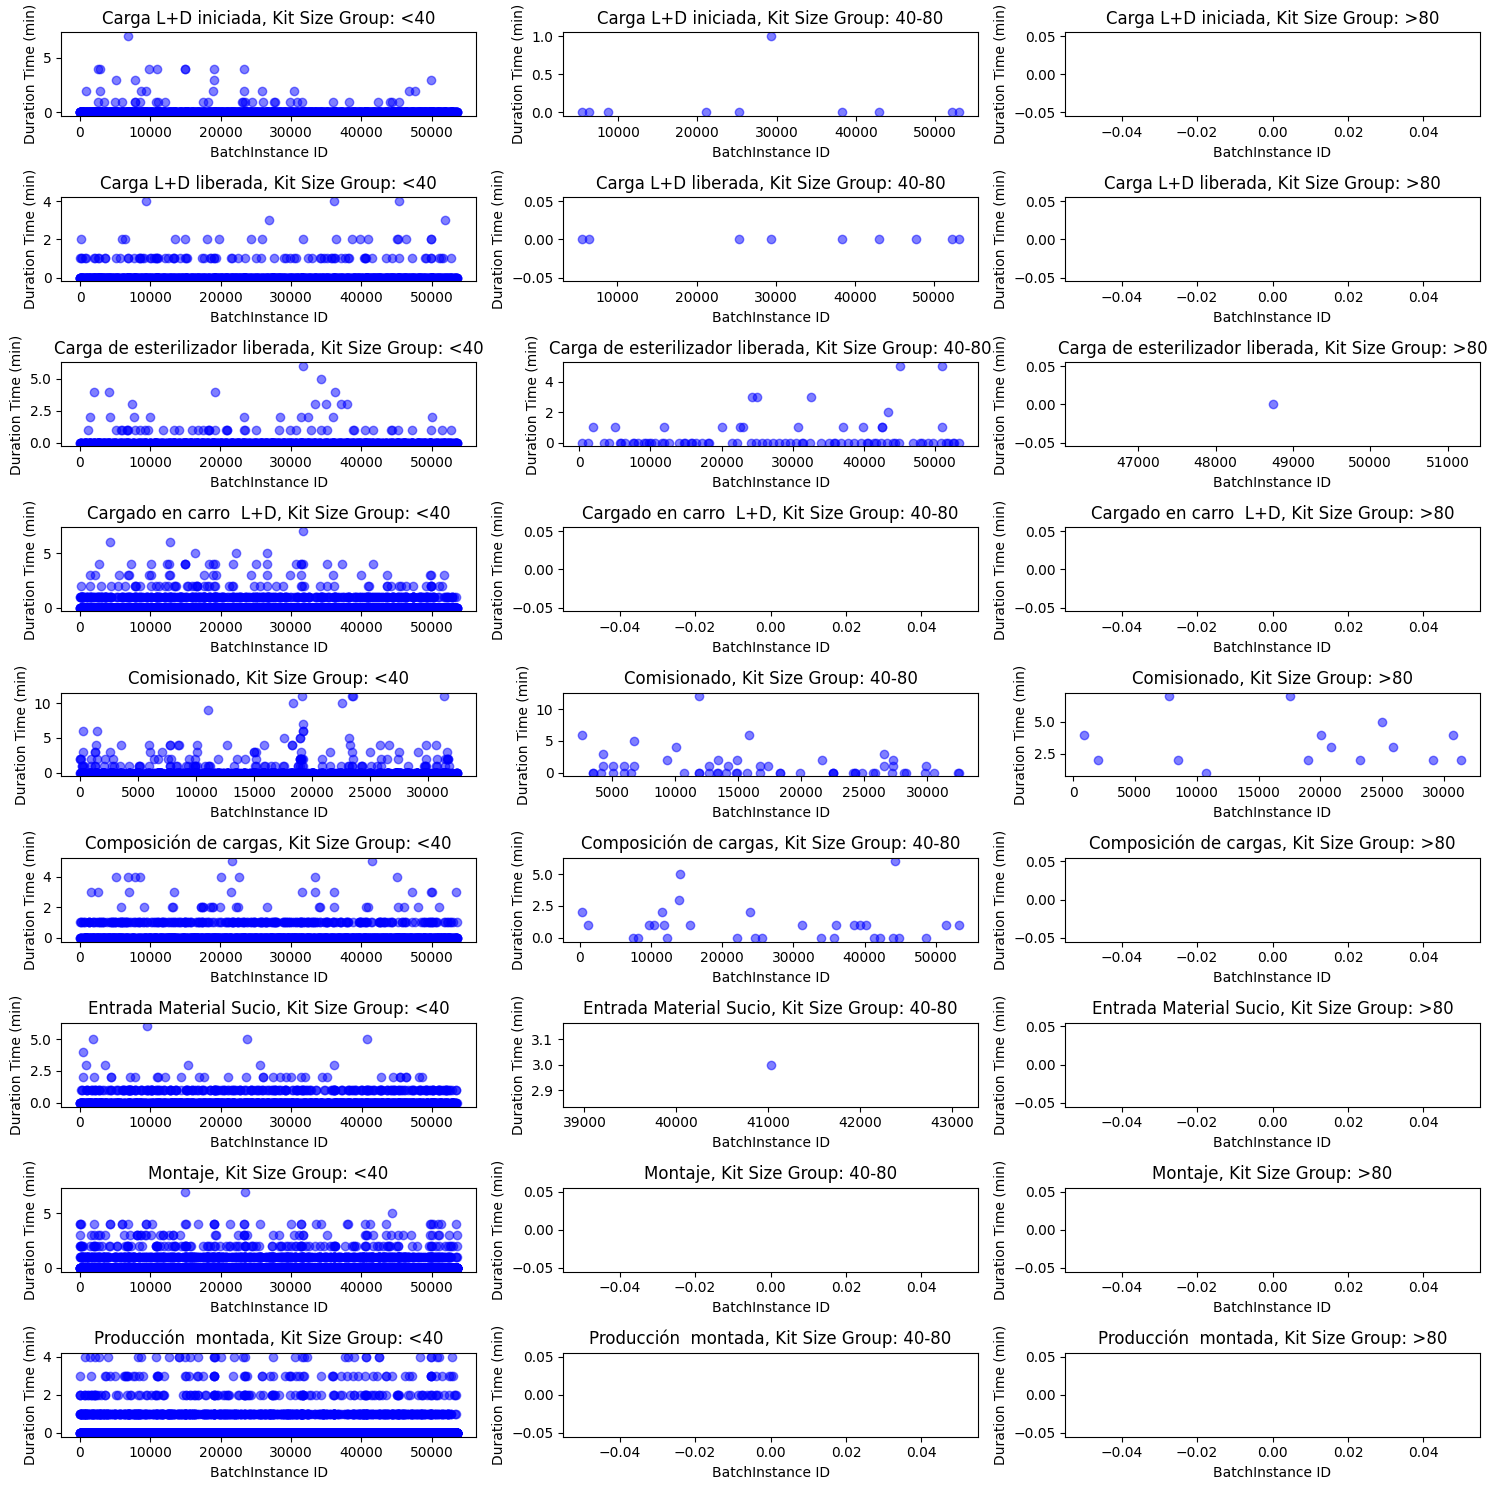

In [13]:
cypher_query_average_processing_time_per_batch = """
    MATCH (n:BatchInstance)
    WITH n, (datetime(n.latest_timestamp).epochMillis - datetime(n.earliest_timestamp).epochMillis)/60000 AS duration_time_min,
         size(n.kits) AS kit_size
    RETURN n.activity AS activity,
           n.batch_number AS batch_number, 
           duration_time_min,
           CASE WHEN kit_size < 40 THEN '<40'
                WHEN kit_size >= 40 AND kit_size <= 80 THEN '40-80'
                ELSE '>80' END AS kit_size_group
"""


def average_processing_time_per_batch(uri, username, password, cypher_query):
    driver = GraphDatabase.driver(uri, auth=(username, password))
    with driver.session() as session:
        result = session.run(cypher_query)
        data = result.data()
        return data

results_average_processing_time_per_batch = average_processing_time_per_batch(uri, username, password, cypher_query_average_processing_time_per_batch)


activities = set(row['activity'] for row in results_average_processing_time_per_batch)
kit_size_groups = ['<40', '40-80', '>80']


fig, axs = plt.subplots(len(activities), len(kit_size_groups), figsize=(15, 15))


for i, activity in enumerate(sorted(activities)):
    for j, kit_size_group in enumerate(kit_size_groups):
   
        filtered_data = [(row['batch_number'], row['duration_time_min']) for row in results_average_processing_time_per_batch 
                         if row['activity'] == activity and row['kit_size_group'] == kit_size_group]

        x_values = [entry[0] for entry in filtered_data]
        y_values = [entry[1] for entry in filtered_data]
     
        axs[i, j].scatter(x_values, y_values, color='blue', alpha=0.5)
        axs[i, j].set_title(f'{activity}, Kit Size Group: {kit_size_group}')
        axs[i, j].set_xlabel('BatchInstance ID')
        axs[i, j].set_ylabel('Duration Time (min)')

plt.tight_layout()
plt.show()

##### Throughput of Batches per Day


In [14]:
cypher_throughput_analysis = """
    MATCH (n:BatchInstance)
    WITH n, date(n.earliest_timestamp) AS day
    RETURN day,
           count(n) AS batch_count
    ORDER BY day
"""


def throughput_analysis(uri, username, password, cypher_throughput_analysis):
    driver = GraphDatabase.driver(uri, auth=(username, password))
    with driver.session() as session:
        result = session.run(cypher_throughput_analysis)
        data = result.data()
        return data
    
results_throughput_analysis = throughput_analysis(uri, username, password, cypher_throughput_analysis)

days = [str(row['day']) for row in results_throughput_analysis]
batch_counts = [row['batch_count'] for row in results_throughput_analysis]

dates = [datetime.strptime(day, '%Y-%m-%d') for day in days]

colors = ['gray' if date.weekday() < 5 else 'orangered' for date in dates]


fig = go.Figure()

fig.add_trace(go.Scatter(
    x=days,
    y=batch_counts,
    mode='lines',
    line=dict(color='gray'),
    showlegend=False
))

for i, day in enumerate(days):
    text_position = 'bottom center' if i % 2 == 0 else 'top center'
    fig.add_trace(go.Scatter(
        x=[day],
        y=[batch_counts[i]],
        mode='markers+text',
        marker=dict(color=colors[i]),
        text=[batch_counts[i]],
        textposition=text_position,
        textfont=dict(size=11, color='black', family='Arial Black'),
        showlegend=False
    ))

fig.update_layout(
    title='Throughput Analysis',
    xaxis_title='Date',
    yaxis_title='BatchInstances Count',
    xaxis_tickangle=-90,
    xaxis_tickfont_size=15,
    width=1600,
    height=1200
)

fig.update_layout(hovermode='x unified')

fig.show()

#pio.write_image(fig, 'BatchInstancesThroughputAnalysis.png', width=1000, height=600, scale=3)


#### Resource Related Analytics

##### Batches per Resource

In [15]:
cypher_batches_per_resource = """
    MATCH (u:Resource)-[:CORR]->(n:BatchInstance)
    RETURN u.sysId AS resource, count(n) AS batch_count
    ORDER BY batch_count DESC
"""


def batches_per_resource(uri, username, password, cypher_batches_per_resource):
    driver = GraphDatabase.driver(uri, auth=(username, password))
    with driver.session() as session:
        result = session.run(cypher_batches_per_resource)
        data = result.data()
        return data
    
results_batches_per_resource = batches_per_resource(uri, username, password, cypher_batches_per_resource)

resource = [str(row['resource']) for row in results_batches_per_resource]
batch_counts = [row['batch_count'] for row in results_batches_per_resource]


fig = px.bar(x=resource, y=batch_counts, title='BatchInstances per Resource', labels={'x':'Resource', 'y':'BatchInstance Count'}, color=resource, color_discrete_sequence=['orangered', 'green', 'blue', 'purple', 'orange'])

fig.update_layout(
    xaxis_tickangle=-45,
    xaxis_tickfont_size=12,
    yaxis_title='BatchInstance Count',
    xaxis_title='Resource',
    uniformtext_minsize=7,
    uniformtext_mode='hide',
    width=900, 
    height=600,
    showlegend=False 
)

fig.update_traces(texttemplate='%{y}', textposition='outside')

fig.show()

#pio.write_image(fig, 'BatchInstances_per_Resource.png', width=800, height=400, scale=3)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



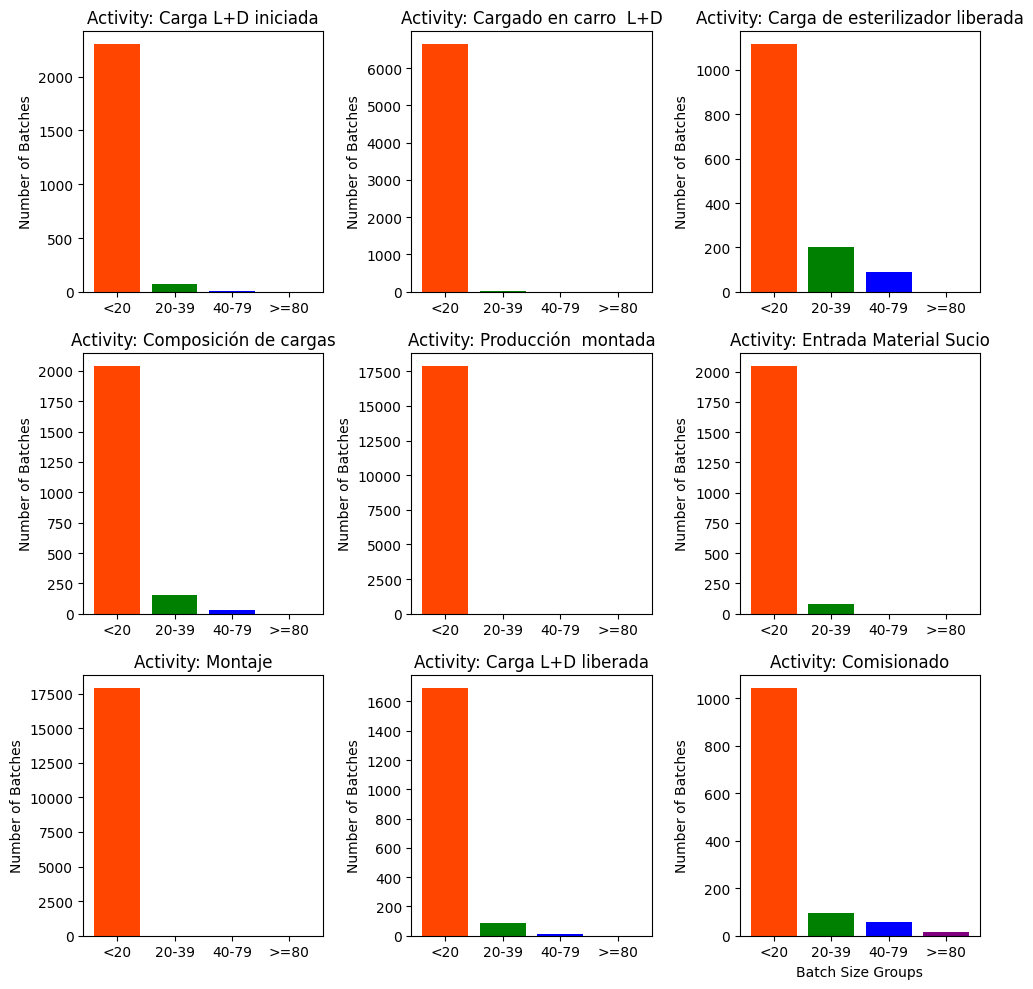

In [16]:
cypher_batches_per_activity = """
    MATCH (n:BatchInstance)
    WITH n.activity AS activity, size(n.kits) AS batch_size
    RETURN activity, 
           sum(CASE WHEN batch_size < 20 THEN 1 ELSE 0 END) AS kits_lt_20,
           sum(CASE WHEN batch_size >= 20 AND batch_size < 40 THEN 1 ELSE 0 END) AS kits_20_39,
           sum(CASE WHEN batch_size >= 40 AND batch_size < 80 THEN 1 ELSE 0 END) AS kits_40_79,
           sum(CASE WHEN batch_size >= 80 THEN 1 ELSE 0 END) AS kits_gt_80
"""

def batches_per_activity(uri, username, password, cypher_query):
    driver = GraphDatabase.driver(uri, auth=(username, password))
    with driver.session() as session:
        result = session.run(cypher_query)
        data = result.data()
        return data
    

results_batches_per_activity = batches_per_activity(uri, username, password, cypher_batches_per_activity)


activities = [row['activity'] for row in results_batches_per_activity]
kits_lt_20 = [row['kits_lt_20'] for row in results_batches_per_activity]
kits_20_39 = [row['kits_20_39'] for row in results_batches_per_activity]
kits_40_79 = [row['kits_40_79'] for row in results_batches_per_activity]
kits_gt_80 = [row['kits_gt_80'] for row in results_batches_per_activity]


colors = ['orangered', 'green', 'blue', 'purple']


fig, axs = plt.subplots(3, 3, figsize=(10, 10))


for i, activity in enumerate(activities):
    row = i // 3
    col = i % 3
    axs[row, col].bar(['<20', '20-39', '40-79', '>=80'],
                      [kits_lt_20[i], kits_20_39[i], kits_40_79[i], kits_gt_80[i]],
                      color=colors)
    axs[row, col].set_title(f'Activity: {activity}')
    axs[row, col].set_ylabel('Number of Batches')

plt.xlabel('Batch Size Groups')
plt.tight_layout()
plt.show()


In [17]:
cypher_batches_per_resource = """
    MATCH (u:Resource)-[:CORR]->(n:BatchInstance)
    RETURN u.sysId AS resource, n.activity as activity, count(n) AS batch_count
    ORDER BY batch_count DESC
"""


def batches_per_resource(uri, username, password, cypher_batches_per_resource):
    driver = GraphDatabase.driver(uri, auth=(username, password))
    with driver.session() as session:
        result = session.run(cypher_batches_per_resource)
        data = result.data()
        return data
    
results_batches_per_resource = batches_per_resource(uri, username, password, cypher_batches_per_resource)
print(results_batches_per_resource) 

resource = [str(row['resource']) for row in results_batches_per_resource]
batch_counts = [row['batch_count'] for row in results_batches_per_resource]
activity = [str(row['activity']) for row in results_batches_per_resource]

fig = px.bar(x=resource, y=batch_counts, title='BatchInstances per Resource and Activity', labels={'x':'Resource', 'y':'BatchInstance Count'}, color=activity, color_discrete_sequence=['olive', 'green', 'blue', 'purple', 'orange', 'grey', 'black', 'lime', 'chocolate' ])

fig.update_layout(
    xaxis_tickangle=-45,
    xaxis_tickfont_size=12,
    yaxis_title='BatchInstance Count',
    xaxis_title='Resource',
    uniformtext_minsize=7,
    uniformtext_mode='hide',
    width=1300, 
    height=800,
    showlegend=True 
)

fig.update_traces(texttemplate='%{y}', textposition='outside')

fig.show()

#pio.write_image(fig, 'batches_per_activity_and_res.png', width=800, height=400, scale=3)

[{'resource': 'MCE', 'activity': 'Producción  montada', 'batch_count': 2308}, {'resource': 'MCE', 'activity': 'Montaje', 'batch_count': 2245}, {'resource': 'SM', 'activity': 'Montaje', 'batch_count': 1737}, {'resource': 'SM', 'activity': 'Producción  montada', 'batch_count': 1725}, {'resource': 'PN', 'activity': 'Producción  montada', 'batch_count': 1712}, {'resource': 'PN', 'activity': 'Montaje', 'batch_count': 1696}, {'resource': 'ER', 'activity': 'Montaje', 'batch_count': 1550}, {'resource': 'ER', 'activity': 'Producción  montada', 'batch_count': 1543}, {'resource': 'AV', 'activity': 'Montaje', 'batch_count': 1373}, {'resource': 'AV', 'activity': 'Producción  montada', 'batch_count': 1370}, {'resource': 'PG', 'activity': 'Producción  montada', 'batch_count': 1247}, {'resource': 'PG', 'activity': 'Montaje', 'batch_count': 1238}, {'resource': 'EH', 'activity': 'Producción  montada', 'batch_count': 1205}, {'resource': 'BM', 'activity': 'Montaje', 'batch_count': 1195}, {'resource': 'EH'

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



Limitations

Iterative behaviour

In [18]:
cypher_limit_iterat = """
    MATCH (n:BatchInstance)-[r:DF_BATCH_RESOURCE]->(n1:BatchInstance)-[r1:DF_BATCH_RESOURCE]->(n2:BatchInstance)

    WHERE n.activity=n2.activity 
    and n.activity<>n1.activity 
    and n.resource_sys_id=n1.resource_sys_id 
    and n1.resource_sys_id=n2.resource_sys_id 
    and (duration.inSeconds(n.earliest_timestamp, n2.earliest_timestamp).seconds)<300

    RETURN n.resource_sys_id, n.activity, n.earliest_timestamp, n1.activity, n1.earliest_timestamp, n2.activity, n2.earliest_timestamp
"""

def limit_iterat(uri, username, password, cypher_limit_iterat):
    driver = GraphDatabase.driver(uri, auth=(username, password))
    with driver.session() as session:
        result = session.run(cypher_limit_iterat)
        data = result.data()
        return data
    

results_limit_iterat = limit_iterat(uri, username, password, cypher_limit_iterat)


In [19]:
cypher_limit_iterat_frequency = """
    MATCH p=(n:BatchInstance)-[r:DF_BATCH_RESOURCE]->(n1:BatchInstance)-[r1:DF_BATCH_RESOURCE]->(n2:BatchInstance)

    WHERE n.activity=n2.activity 
    and n.activity<>n1.activity 
    and n.resource_sys_id=n1.resource_sys_id 
    and n1.resource_sys_id=n2.resource_sys_id 
    and (duration.inSeconds(n.earliest_timestamp, n2.earliest_timestamp).seconds)<300

RETURN distinct n.activity as batchInstance_activity1, n1.activity as batchInstance_activity2, n2.activity as batchInstance_activity3, count(*) as frequency
ORDER BY frequency desc
"""

def limit_iterat_frequency(uri, username, password, cypher_limit_iterat_frequency):
    driver = GraphDatabase.driver(uri, auth=(username, password))
    with driver.session() as session:
        result = session.run(cypher_limit_iterat_frequency)
        data = result.data()
        return data
    

results_limit_iterat_frequency = limit_iterat_frequency(uri, username, password, cypher_limit_iterat_frequency)

sequences = [f"{record['batchInstance_activity1']} -> {record['batchInstance_activity2']} -> {record['batchInstance_activity3']}" for record in results_limit_iterat_frequency]
frequencies = [record['frequency'] for record in results_limit_iterat_frequency]

fig = px.bar(x=sequences, y=frequencies, title='Iterative BatchInstance Activity Sequences Frequency',
             labels={'x': 'Activity Sequence', 'y': 'Frequency'},
             text=frequencies)

fig.update_layout(xaxis_tickangle=-45, xaxis_title='Activity Sequence', yaxis_title='Frequency', xaxis_tickfont_size=9, width=1000, height=600)

fig.show()

#pio.write_image(fig, 'Iterative BatchInstance Activity Sequences Frequency.png', width=800, height=600, scale=3)


In [20]:
cypher_activity_working_together= """
MATCH (u:Resource)-[:CORR]->(n:BatchInstance),
      (u1:Resource)-[:CORR]->(n1:BatchInstance)
WHERE n.activity = n1.activity AND u <> u1
AND (n.earliest_timestamp <= n1.latest_timestamp AND n.latest_timestamp >= n1.earliest_timestamp)
AND abs(duration.inSeconds(n.earliest_timestamp, n1.earliest_timestamp).seconds) <= 300
RETURN distinct n.activity as activity, count(n) as BatchInstances_number
 """

def activity_working_together(uri, username, password, cypher_activity_working_together):
    driver = GraphDatabase.driver(uri, auth=(username, password))
    with driver.session() as session:
        result = session.run(cypher_activity_working_together)
        data = result.data()
        return data
    
results_cypher_activity_working_together = activity_working_together(uri, username, password, cypher_activity_working_together)

fig = px.bar(results_cypher_activity_working_together, x='activity', y='BatchInstances_number', 
             labels={'n.activity': 'Activity', 'count(n)': 'Number of Batches'},
             title='Distribution of Batches where Resources Worked Together within 5-Minute Time Window')

fig.update_traces(texttemplate='%{y}', textposition='outside', textfont_size=8)

fig.update_traces(marker_color='skyblue')

fig.show()
